# **This Experiment is about Implementing ID3 Algorithm**

# **Importing the Libraries**



In [1]:
!pip install decision-tree-id3 #pip-this install and manages the software packages and
import matplotlib.pyplot as plt
import pandas as pd
import six #It is a Python 2 and 3 compatibility library. It provides utility functions for smoothing over the differences between the Python versions
import sys #provides various functions and variables that are used to manipulate different parts of the Python runtime environment.
sys.modules['sklearn.externals.six']=six

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.2 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=7204865f9230ff44d36762303f7c95bd40d7970f6dae6cf2a94f658a17cb70f4
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


about ID3

The ID3 (Iterative Dichotomiser 3) algorithm is used in machine learning to create decision trees based on entropy and information gain. It is commonly applied in classification tasks.

'sklearn.externals.six'

sys.modules is a dictionary that keeps track of all the modules currently loaded in the Python interpreter.
sys.modules 'sklearn.externals.six' is an entry in this dictionary, specifically referring to a module path inside sklearn.externals.

# **Importing the DataSet**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv')

In [4]:
dataset

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
dataset.head(5) #top 5 rows and columns

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


# **Encoding the Categorical Data**

In [6]:
#converting the data into numerics
#It is done by usig the Label Encoder
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
#converting each column of data into numerics
dataset['Outlook']=Le.fit_transform(dataset['Outlook'])
dataset['Temperature']=Le.fit_transform(dataset['Temperature'])
dataset['Humidity']=Le.fit_transform(dataset['Humidity'])
dataset['Wind']=Le.fit_transform(dataset['Wind'])
dataset['Play Tennis']=Le.fit_transform(dataset['Play Tennis'])

In [7]:
y=dataset['Play Tennis']
x=dataset.drop('Play Tennis',axis=1)  #(axis=1) means This indicates that the operation should be applied to columns. If axis=1, it removes a column by its label.
#If axis=0, it removes rows by their index.

In [8]:
print(x)

    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
14        2            1         1     1


In [9]:
print(y)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Play Tennis, dtype: int64


# **Splitting the DataSet into Training and Testing**

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=0)#Specifies that 20% of the data will be used for testing
#we use the random_state as when we split a dataset or initialize random processes the results might vary slightly each time due to randomness.
#By specifying a random_state value, you ensure that the process produces the same result every time you run the code, making debugging and collaboration easier

# **Decision Tree Classification and Visualization**

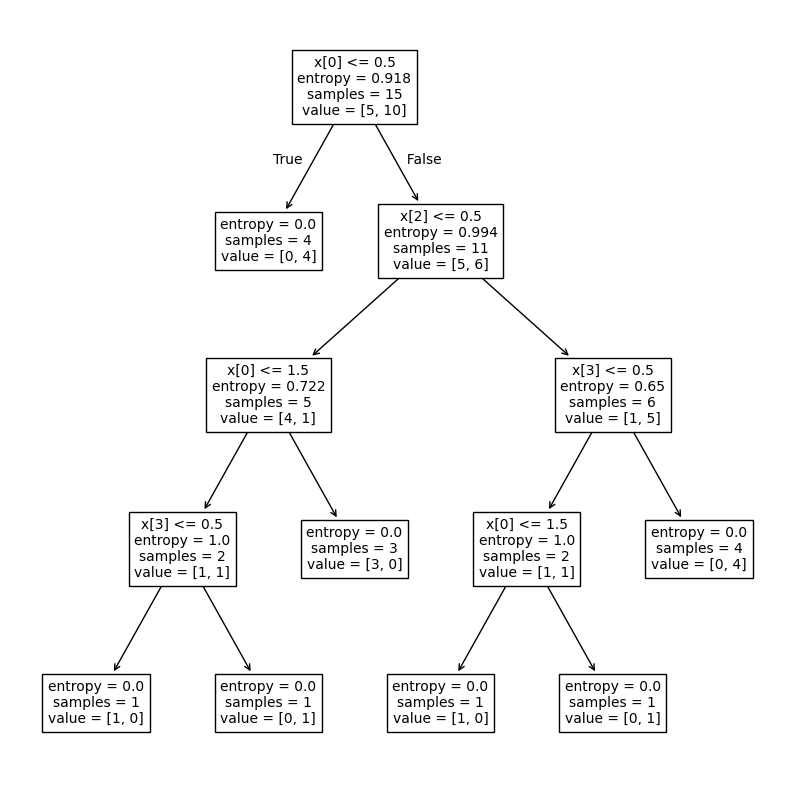

In [15]:
from sklearn import tree #This imports the tree module from Scikit-learn, which provides the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='entropy') #The entropy criterion means that the model will use the concept of information gain to make splits
clf.fit(x_train, y_train) #The model learns the patterns in the data during this training phase
clf.fit(x,y) #This fits the model again using the entire dataset
fig, ax = plt.subplots(figsize=(10, 10)) #This creates a figure and axes for plotting with a specified size
tree.plot_tree(clf, fontsize=10)
plt.show()

In [16]:
x_pred=clf.predict(x_test) #The model will use the learned patterns from the training data to predict the target labels for this unseen data.

# **Training and Evaluating an ID3 Decision Tree Classifier**

In [17]:
import numpy as np
np.float = np.float64
from id3 import Id3Estimator #This imports the tree module from Scikit-learn, which provides the maximum information gain
from sklearn.metrics import classification_report
estimator=Id3Estimator()
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
print("Classification Report\n",classification_report(y_test,pred))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,x_pred))

1.0
